Airline Passenger Satisfaction
What factors lead to customer satisfaction for an Airline?

Abstract/Introduction

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

First, let's get some data classification of the Airline Passenger Satisfaction dataset from Kaggle, to identify the critical factors that lead to customer satisfaction.

Data Wrangling
"Garbage in, Garbage out"

In [2]:
# Python tools 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from pandas.plotting import scatter_matrix

#import pandas_profiling

In [2]:
#Importing Data
test_APS = pd.read_csv('test_APS.csv')
train_APS = pd.read_csv('train_APS.csv')


In [3]:
#test_APS.head() 
train_APS.head() #train dataframe

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Content Variable Explanation:

Gender: Gender of the passengers (Female, Male)
Customer Type: The customer type (Loyal customer, disloyal customer)
Age: The actual age of the passengers
Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
Flight distance: The flight distance of this journey
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
Ease of Online booking: Satisfaction level of online booking
Gate location: Satisfaction level of Gate location
Food and drink: Satisfaction level of Food and drink
Online boarding: Satisfaction level of online boarding
Seat comfort: Satisfaction level of Seat comfort
Inflight entertainment: Satisfaction level of inflight entertainment
On-board service: Satisfaction level of On-board service
Leg room service: Satisfaction level of Leg room service
Baggage handling: Satisfaction level of baggage handling
Check-in service: Satisfaction level of Check-in service
Inflight service: Satisfaction level of inflight service
Cleanliness: Satisfaction level of Cleanliness
Departure Delay in Minutes: Minutes delayed when departure
Arrival Delay in Minutes: Minutes delayed when Arrival
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Types of Data: Categorical vs Numerical

In [4]:
train_APS.nunique() # Observation of what Type of Data (Categorical or Numerical) is in the Dataset

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

Categorical: "Gender", "Customer Type", "Type of Travel", "Class" and "Satisfaction".

Numerical: "Age", "Flight Distance", "Departure Delay" and "Arrival Delay".

Grade(1-5): Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service and Cleanliness. 

Let's check if we have missing values in out train datasets in %

In [5]:
#test_APS.isnull().sum()*100/len(test_APS) # Found just 0.3% missing values on "Arrival Delay"     

In [6]:
train_APS.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
train_APS.isnull().sum()*100/len(train_APS) # Found less than 0.3% missing values on "Arrival Delay"

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

<AxesSubplot:>

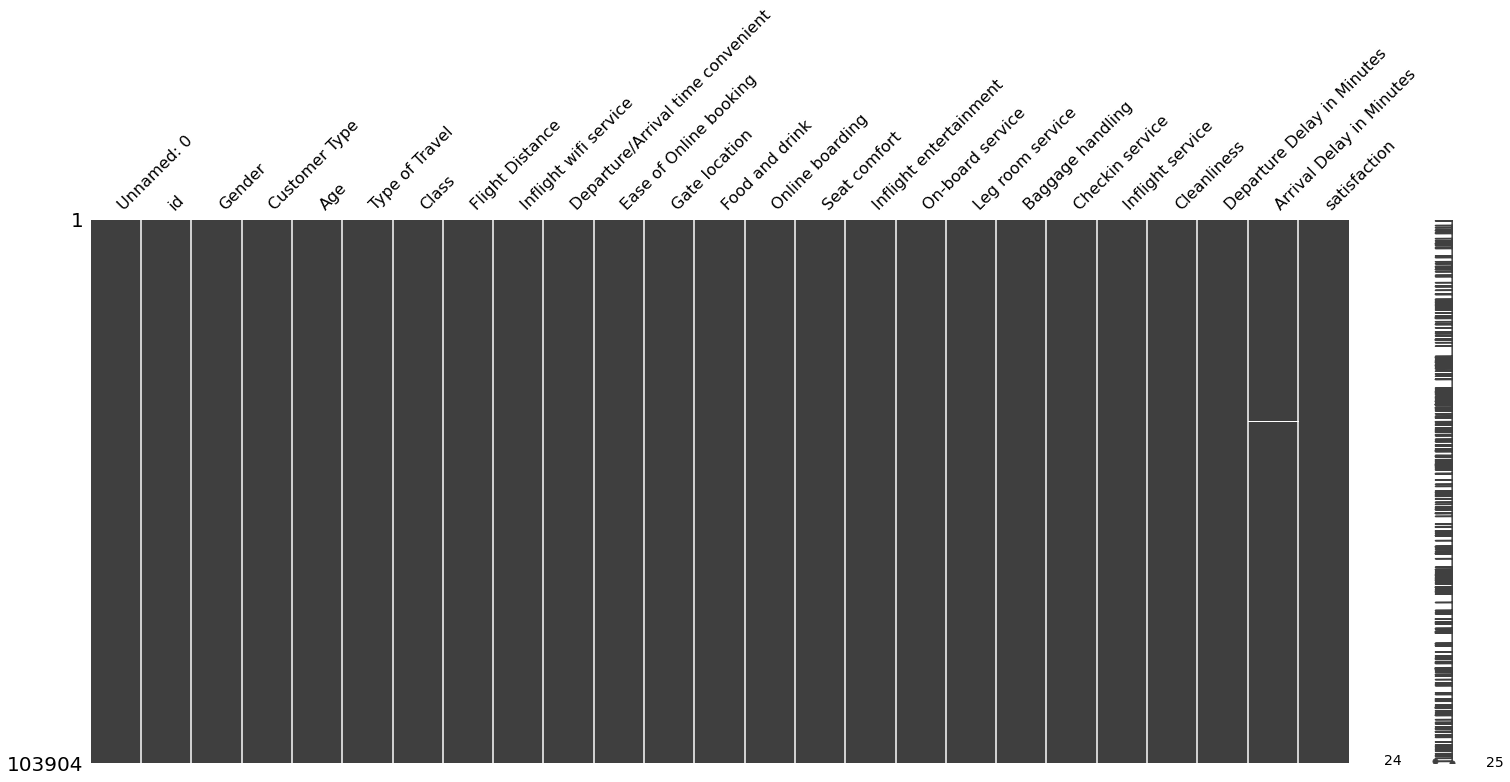

In [8]:
msno.matrix(train_APS)

"Arrival Delay in Minutes" is the only variable with missing values. Let's get some statistic of this variable.

In [9]:
#train_APS['Arrival Delay in Minutes'].describe()

The Dataset has less than 0.3% of missing values (310/103904), just in the "Arrival Delay" column, so we are going to drop those missing values's row. 

In [10]:
train_APS.dropna(subset = ['Arrival Delay in Minutes'], inplace=True)

In [11]:
train_APS.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

At this point, we are ready to do some Data Analysis.
Let's start with visualizing the correlation between variables in a heatmap. Also, we need to encode categorical data into numerical data.

In [12]:
train_APS['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [13]:
train_APS['Customer Type'].replace(['disloyal Customer', 'Loyal Customer'], [0, 1], inplace=True)

In [14]:
train_APS['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1], inplace=True)

In [15]:
train_APS['Class'].replace(['Eco', 'Eco Plus', 'Business'], [0, 1, 2], inplace=True)

In [16]:
train_APS['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)

In [17]:
train_APS.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,1,13,0,1,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,0,25,1,2,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,1,26,1,2,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,1,25,1,2,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,1,61,1,2,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,5,111157,0,1,26,0,0,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,0
6,6,82113,1,1,47,0,0,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,0
7,7,96462,0,1,52,1,2,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,1
8,8,79485,0,1,41,1,2,853,1,2,...,1,1,2,1,4,1,2,0,0.0,0
9,9,65725,1,0,20,1,0,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,0


<AxesSubplot:>

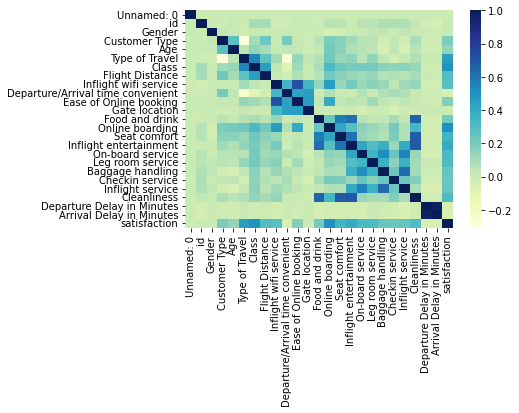

In [18]:
sns.heatmap(train_APS.corr(), cmap='YlGnBu', xticklabels=True, yticklabels=True)

From the correlation heatmap, we need to numerically identify which variables are highly correlated and use them for our prediction model.

In [19]:
corr = train_APS.corr()

In [20]:
Rank_Corr_List = corr[corr<1].unstack().transpose().sort_values(ascending=False).drop_duplicates()

In [21]:
Rank_Corr_List.head(20)

Arrival Delay in Minutes           Departure Delay in Minutes    0.965481
Ease of Online booking             Inflight wifi service         0.715848
Cleanliness                        Inflight entertainment        0.691735
                                   Seat comfort                  0.678478
Food and drink                     Cleanliness                   0.657648
Baggage handling                   Inflight service              0.628944
Inflight entertainment             Food and drink                0.622374
                                   Seat comfort                  0.610614
Seat comfort                       Food and drink                0.574561
On-board service                   Inflight service              0.550725
Type of Travel                     Class                         0.545185
On-board service                   Baggage handling              0.519252
Online boarding                    satisfaction                  0.503447
Class                              sat

We are going to consider, just the highest correlated variables (correlation > 0.45) for our prediction model (including "satisfaction"). We are going to drop those variables/columns that does not have significan correlation.

In [22]:
train_APS.drop(['Gender', 'Age', 'Flight Distance', 'Departure/Arrival time convenient', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1, inplace=True)

In [23]:
train_APS.head()

,Unnamed: 0,id,Customer Type,Type of Travel,Class,Inflight wifi service,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,satisfaction
0,0,70172,1,0,1,3,1,5,3,5,5,4,4,0
1,1,5047,0,1,2,3,3,1,3,1,1,3,1,0
2,2,110028,1,1,2,2,2,5,5,5,5,4,4,1
3,3,24026,1,1,2,2,5,2,2,2,2,3,1,0
4,4,119299,1,1,2,3,3,4,5,5,3,4,3,1


In [24]:
#sns.heatmap(train_APS.corr(), cmap='YlGnBu', xticklabels=True, yticklabels=True)

In [25]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(train_APS)
#report.to_file(output_file='output.html')

We need to separate the data into the Features and Targets. The target, also known as the label, is the value we want to predict, in this case, the “satisfaction” of airline passengers, and the features are all the columns the model uses to make a prediction. We will also convert the Pandas dataframes to Numpy arrays because that is the way the algorithm works.

In [26]:
train_labels = np.array(train_APS['satisfaction']) #Label

In [27]:
train_APS = train_APS.drop('satisfaction', axis = 1) #Remove label from DF

In [28]:
train_APS_list = list(train_APS.columns) #To use later

In [29]:
train_APS = np.array(train_APS)

Training the Model: Random Forest

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(train_APS, train_labels)

RandomForestClassifier()

Les's test our Random Forest Model

In [33]:
test_APS.dropna(subset = ['Arrival Delay in Minutes'], inplace=True)

In [34]:
test_APS['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)

In [35]:
test_APS['Customer Type'].replace(['disloyal Customer', 'Loyal Customer'], [0, 1], inplace=True)

In [36]:
test_APS['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1], inplace=True)

In [37]:
test_APS['Class'].replace(['Eco', 'Eco Plus', 'Business'], [0, 1, 2], inplace=True)

In [38]:
test_APS.drop(['Gender', 'Age', 'Flight Distance', 'Departure/Arrival time convenient', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1, inplace=True)

In [39]:
test_labels = np.array(test_APS['satisfaction']) # Test Label

In [40]:
test_APS = test_APS.drop('satisfaction', axis = 1) #Remove label from DF

In [41]:
test_APS_list = list(test_APS.columns) #To use later

In [42]:
test_APS = np.array(test_APS)

In [43]:
predictions = rf.predict(test_APS) #Use RF predict on test data

In [44]:
accuracy_score(test_labels, predictions)

0.9574016143359209

In [45]:
confusion_matrix(test_labels, predictions)

array([[14166,   362],
       [  741, 10624]])

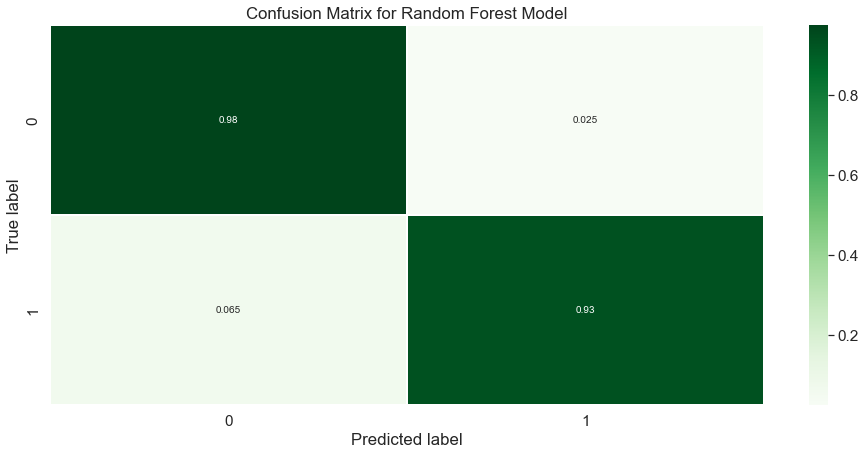

In [46]:
matrix = confusion_matrix(test_labels, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()